### Where to Start with Machine Learning and Deep Learning?

This is an honestly difficult question - and you'll see a variety of different approaches. Some start "bottom-up", meaning one tries to learn all of the components of machine learning before actually attempting it. Others start "top-down", meaning one runs machine learning programs or projects before understanding much of how it works, and then tries to understand the components from the most general "down" to the highly specific.

We will tend more towards the top-down approach, but inject focus on specific concepts that are both technical and part of the machine learning terminology. Machine learning involves the fields of applied mathematics, computer science, statistics, information theory, and neuroscience - and that's at a minimum! So, be **patient** with yourself as you take your first steps into this interesting and challenging world. There is a great deal to learn, explore and refine.

Anyways, it would seem a good idea to start with the idea of **learning** before attempting anything further. What is "learning" for a computer (e.g., a machine)?

The basic concept is that *in order to learn there must be:  
* a **target** (like a learning goal or task)
* **training** on target samples
* **testing** performance on new samples 
* a **cost**, also called **loss**, for correction/direction 

Let's say we want a machine learning program that can tell if an image contains a dog or a cat. This is our **target**, and we want to achieve this goal with as high accuracy (little error) as possible. We will **train** our program on sample images of dogs and cats that we have pre-labeled. After training, we will **test** our program (also called a **model**) on new sample images of dogs and cats that we have not yet shown our program. During both the traning and testing processes, we must help our program learn by applying **cost**, or **loss**, when it makes a mistake. Conceptually, this not unlike a classic education model you find at school. 

Let's have a look at how this all works (and doesn't) in a very basic ML program (adapted from: https://github.com/aymericdamien/TensorFlow-Examples ) and then a basic **multi-layer** program (adapted from:https://github.com/pkmital/CADL/blob/master/session-2/lecture-2.ipynb).



In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow.contrib.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jonathan.she

Instructions for updating:
non-resource variables are not supported in the long term


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

In [2]:
# Parameters 
learning_rate = 0.05
training_epochs = 1000 #how many cycles of training
display_step = 50

In [3]:
# Training Data 
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# Normalize data by "smushing" to 0.0 - 1.0 "unit" range
train_X = train_X/np.ndarray.max(train_X)
train_Y = train_Y/np.ndarray.max(train_Y)

print(train_X, train_Y)

[0.3058104  0.4077472  0.509684   0.62181448 0.64220183 0.3862478
 0.90621814 0.57288481 0.70336391 0.20081549 0.65258085 1.
 0.49235474 0.74108053 0.52395515 0.85904921 0.28727643] [0.49062049 0.7965368  0.6031746  0.92063492 0.48888889 0.45396825
 0.97142857 0.74920635 0.73015873 0.35238095 0.81587302 1.
 0.47619048 0.83809524 0.6984127  0.84848485 0.37518038]


In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))
b = tf.get_variable("bias", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


In [5]:
# Construct a linear model to predict output of Y given X
Y_pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.012987703 W= 0.72306365 b= 0.2654766
Epoch: 0100 cost= 0.012936943 W= 0.7327308 b= 0.2599133
Epoch: 0150 cost= 0.012901553 W= 0.74075216 b= 0.25509763
Epoch: 0200 cost= 0.012876585 W= 0.74748045 b= 0.2510581
Epoch: 0250 cost= 0.012858971 W= 0.75312483 b= 0.24766922
Epoch: 0300 cost= 0.012846531 W= 0.7578597 b= 0.24482657
Epoch: 0350 cost= 0.012837742 W= 0.76183224 b= 0.24244155
Epoch: 0400 cost= 0.012831530 W= 0.7651646 b= 0.24044089
Epoch: 0450 cost= 0.012827128 W= 0.76795995 b= 0.23876265
Epoch: 0500 cost= 0.012824018 W= 0.77030486 b= 0.23735489
Epoch: 0550 cost= 0.012821812 W= 0.7722715 b= 0.23617391
Epoch: 0600 cost= 0.012820240 W= 0.77392155 b= 0.23518328
Epoch: 0650 cost= 0.012819126 W= 0.77530545 b= 0.23435226
Epoch: 0700 cost= 0.012818330 W= 0.77646714 b= 0.2336551
Epoch: 0750 cost= 0.012817764 W= 0.77744067 b= 0.23307048
Epoch: 0800 cost= 0.012817357 W= 0.778258 b= 0.23257986
Epoch: 0850 cost= 0.012817063 W= 0.7789434 b= 0.23216829
Epoch: 0900 cost= 0.01281

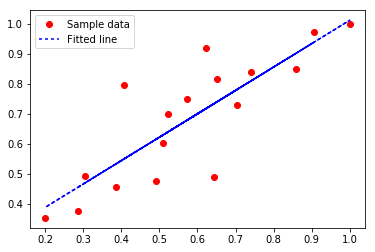

In [8]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    
    #Plot linear prediction
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.legend()
    plt.show()

You can compare this 'toy' model with Google's widget here: https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

What is essential to notice is how the cost updates the **weight** and **bias** of our predicted output for Y. This allows our program to "fit" the data by charting a line through the central relationship between X and Y samples.

While our model is able to fit a straight line through linear data, it is quite limited. A straight line can only separate very linear data. What if our data is non-linear (e.g. curved) or if has significant outliers (extreme values)? A linear cost function won't work - Let's see if we can fit a quadratic cost function to such a data collection. 

In [9]:
#reset our graph values
tf.reset_default_graph()

In [10]:
train_X = np.linspace(0, 1, 100)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.random.randn()), dtype=tf.float32)
b = tf.get_variable("bias", initializer=tf.constant(0, dtype=tf.float32))

In [12]:
# Construct a polynomial model to predict output of Y given X
#Y_pred = X**2 + X*W + b
#Y_pred = tf.add(tf.add(tf.multiply(X, X), tf.multiply(X, W)), b)
Y_pred = tf.Variable(tf.random_normal([1]), name='prediction')
for pow_i in range(1, 4):
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), tf.add(Y_pred, b))
    

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.042213362 W= -0.17817804 b= 0.019368956
Epoch: 0100 cost= 0.041422300 W= -0.19575149 b= 0.02709171
Epoch: 0150 cost= 0.041403655 W= -0.1964009 b= 0.027377708
Epoch: 0200 cost= 0.041402970 W= -0.19642538 b= 0.027386764
Epoch: 0250 cost= 0.041402925 W= -0.19642699 b= 0.027386012
Epoch: 0300 cost= 0.041402925 W= -0.19642697 b= 0.027384026
Epoch: 0350 cost= 0.041402925 W= -0.19642699 b= 0.027382037
Epoch: 0400 cost= 0.041402925 W= -0.19642699 b= 0.027380051
Epoch: 0450 cost= 0.041402925 W= -0.19642697 b= 0.027378066
Epoch: 0500 cost= 0.041402925 W= -0.19642699 b= 0.027376076
Epoch: 0550 cost= 0.041402925 W= -0.19642699 b= 0.02737409
Epoch: 0600 cost= 0.041402925 W= -0.19642697 b= 0.027372105
Epoch: 0650 cost= 0.041402925 W= -0.19642699 b= 0.027370116
Epoch: 0700 cost= 0.041402925 W= -0.19642699 b= 0.02736813
Epoch: 0750 cost= 0.041402925 W= -0.19642697 b= 0.027366145
Epoch: 0800 cost= 0.041402925 W= -0.19642699 b= 0.027364155
Epoch: 0850 cost= 0.041402925 W= -0.19642699

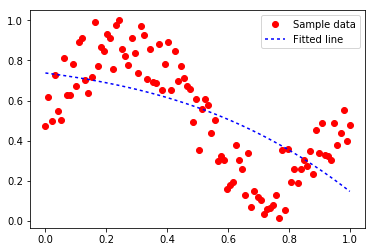

In [15]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    #Plot linear prediction
    #plt.plot(train_X, train_X * train_X + sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.plot(train_X, sess.run(Y_pred, feed_dict={X: train_X}), dashes=[2, 2], color='blue', label='Fitted line')
    
    # all this just to avoid duplicating legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

In [16]:
tf.reset_default_graph()
sess.close()

This does a bad job of fitting. Visually, we can see it curve, but it has no ability to fit the data, which is has sine wave motion. Our function is **underfitting**. **Overfitting**, on the other hand, is when our cost function is *too* complex for our data. This can often be shown as curving too much or in the wrong directions.

### Network Layers and Nonlinear Activation Functions

Our model above has a major problem: the polynomial function we used for **regression** (our Y_pred prediction of the true Y given X) is not able to **generalize** well (meaning it cannot fit a wide variety of data ranges and features). While we could certainly find better machine learning algorithms than this poor polynomial regression or condition the data so it can fit, let's jump on the deep learning bandwagon and see how it can approach this problem. 

Deep learning has found that adding "layers" and **"activation"** functions can help models better fit more generalized data. You can think of layers as multiple levels of a process - for example instead of one instance of Y_pred = WX + b, we could do it several times in a chain, like: ```L1 = WX + b, and L2 = W*L1 + b and Y_pred = W*L2 + b```. So we pass the result of each layer to the next layer. And we can transform dimensions during this process too. It can get very technical, so we'll just focus on coding it and seeing it in action.

And for the so-called activation functions, you can think of these as functions that give a certain shape to a range of numbers. These activation functions are generally **nonlinear**, and common examples are tanh, sigmoid and relu. See below

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


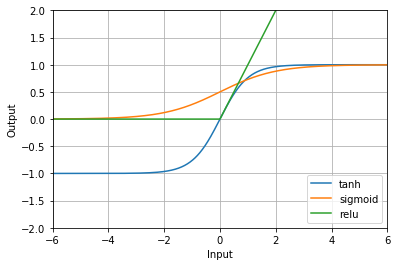

In [17]:
# These activations each give a particular output range for the input range 

x_ = np.linspace(-6,6,1000)
with tf.Session() as sess:
    plt.plot(x_, tf.nn.tanh(x_).eval(), label='tanh')
    plt.plot(x_, tf.nn.sigmoid(x_).eval(), label='sigmoid')
    plt.plot(x_, tf.nn.relu(x_).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')
plt.show()



Here instead of feeding our training examples 1 by 1, we are going to feed them by **batches**. Batches are groups of samples, and this has some benefits. First, they can be more computationally efficient (on GPUs) by grouping array operations. Second, if we randomize the examples in the batches, we can help ensure that our model is not learning *based on the repeating order of training examples*, as this could greatly distort the performance capabilities of the model in a real setting.

In [18]:
sess = tf.Session()
#g = tf.Graph()

train_X = np.linspace(0, 1, 1000)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [19]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        cost = tf.reduce_mean(tf.abs(Y_pred - Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        # We now run a loop over epochs
        for it_i in range(n_iterations):
            # scrambles the order of data so the model can't learn what comes next
            idxs = np.random.permutation(range(len(train_X)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: train_X[idxs_i], Y: train_Y[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

            if it_i % 50 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: train_X}, session=sess)
                fig, ax = plt.subplots(1, 1)
                ax.scatter(train_X, train_Y, alpha=0.99, c='r')
                ax.set_xlim([0, 1])
                ax.set_ylim([0, 1])
                ax.plot(train_X, ys_pred, 'k', alpha=it_i / n_iterations, lw=4)
                print(training_cost, "interation %d" % (it_i))
                fig.show()
                plt.draw()
                plt.show()
    


In [20]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        if activation is None:
            h = tf.matmul(X, W) + b
        if activation is "tanh":
            h = tf.nn.tanh(tf.matmul(X, W) + b, name='tanh')
        if activation is "sigmoid":
            h = tf.nn.sigmoid(tf.matmul(X, W) + b, name='sigmoid')
        if activation is "relu":
            h = tf.nn.relu(tf.matmul(X, W) + b, name='relu')
        print(tf.shape(h))
        return h

Let's see a single layer with the relu activation function, in which we input 1-node and output 10.

Tensor("layer_1/Shape:0", shape=(?,), dtype=int32)
0.32913008 interation 0


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


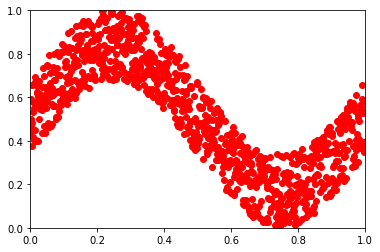

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.13918042 interation 50


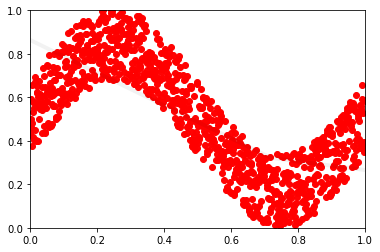

0.13774997 interation 100


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


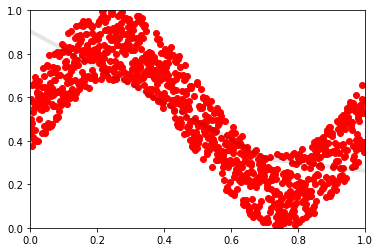

0.13694726 interation 150


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


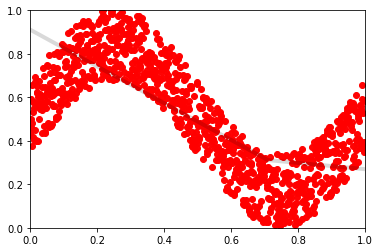

0.13623902 interation 200


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


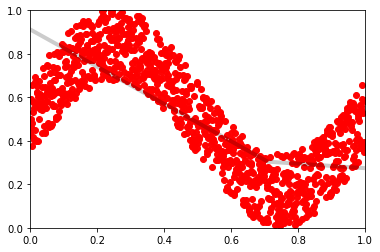

0.1356055 interation 250


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


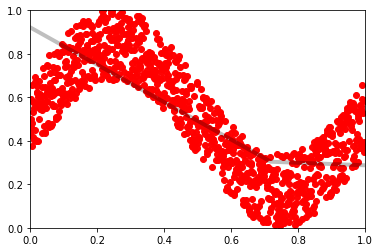

0.13509835 interation 300


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


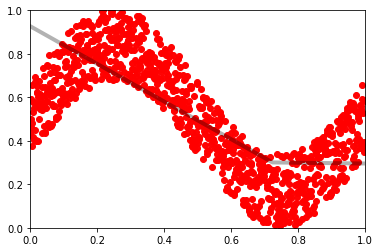

0.13439651 interation 350


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


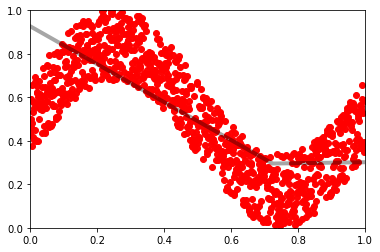

0.13382235 interation 400


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


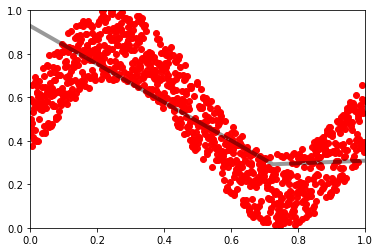

0.13344839 interation 450


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


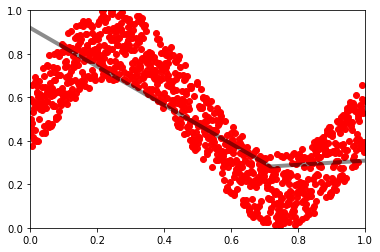

0.13282536 interation 500


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


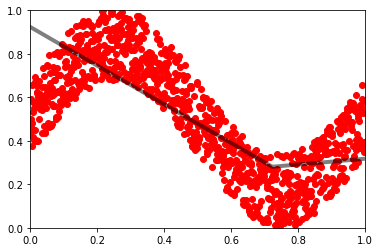

0.13233551 interation 550


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


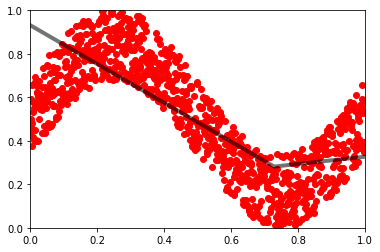

0.1321052 interation 600


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


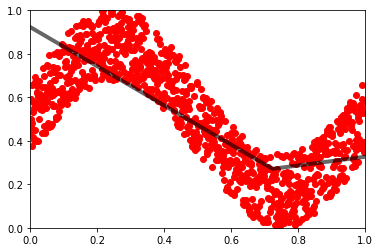

0.13150159 interation 650


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


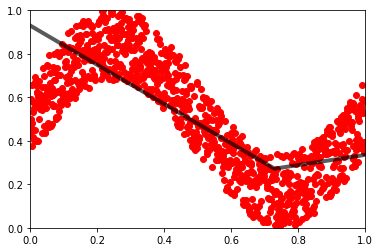

0.13118342 interation 700


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


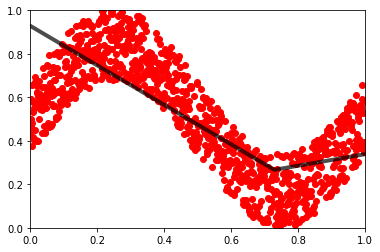

0.1307531 interation 750


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


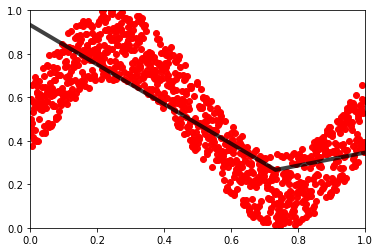

0.13042206 interation 800


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


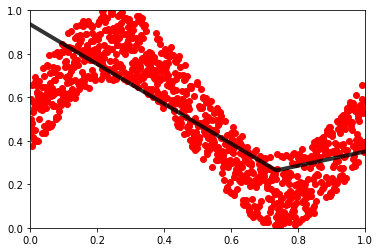

0.1301582 interation 850


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


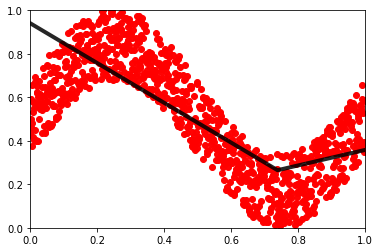

0.13003007 interation 900


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


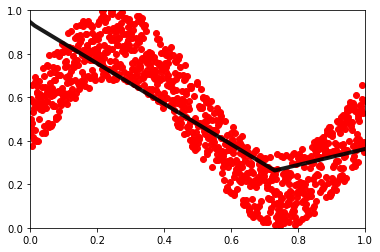

0.13001567 interation 950


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


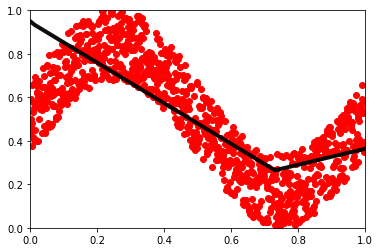

In [21]:

# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 10, activation='relu', scope='layer_1')
Y_pred = tf.reduce_sum(h, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Now for 3 interconnected layers of that is wide and then slimmer with input and output nodes.

Tensor("layer_1/Shape:0", shape=(?,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(?,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(?,), dtype=int32)
0.505695 interation 0


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


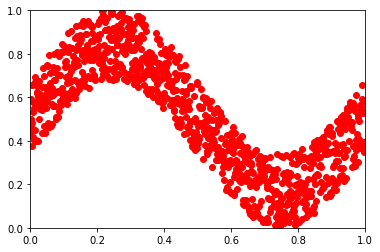

0.505695 interation 50


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


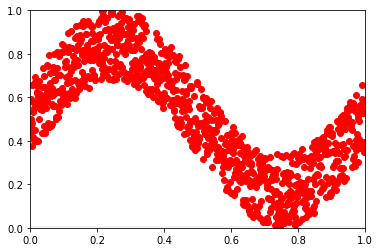

0.505695 interation 100


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


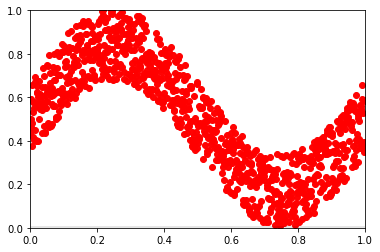

0.505695 interation 150


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


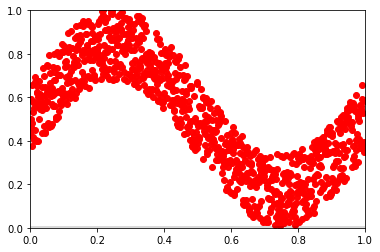

0.505695 interation 200


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


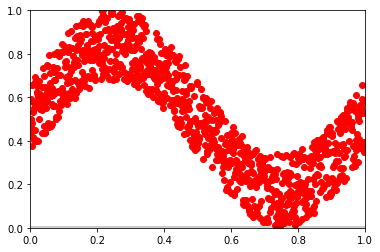

0.505695 interation 250


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


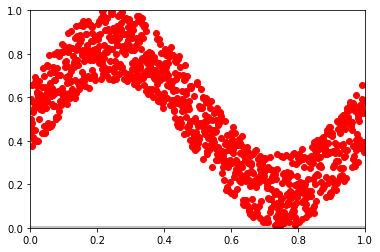

0.505695 interation 300


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


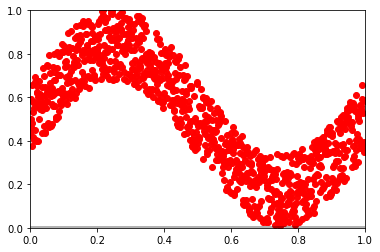

0.505695 interation 350


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


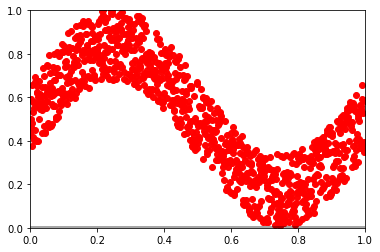

0.505695 interation 400


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


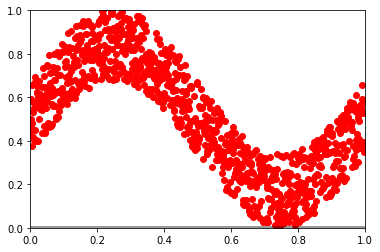

0.505695 interation 450


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


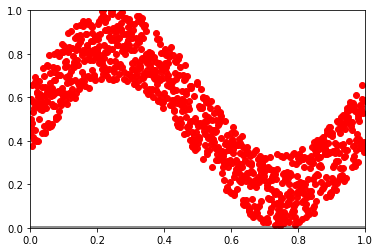

0.505695 interation 500


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


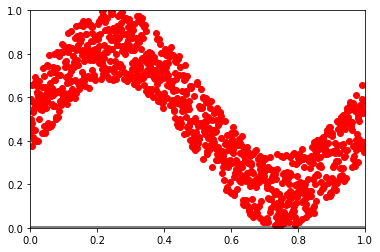

0.505695 interation 550


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


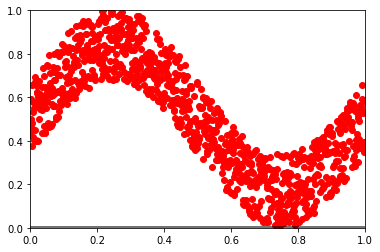

0.505695 interation 600


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


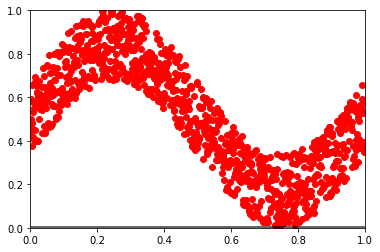

0.505695 interation 650


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


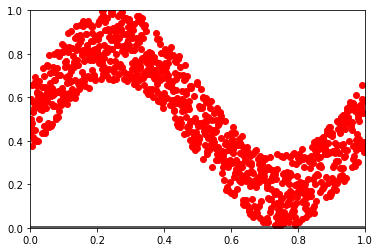

0.505695 interation 700


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


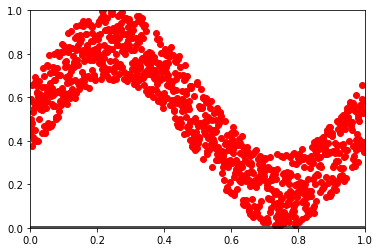

0.505695 interation 750


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


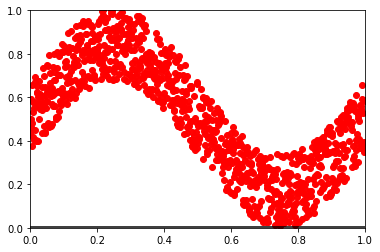

0.505695 interation 800


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


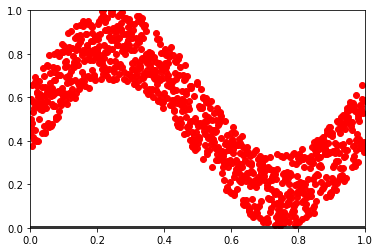

0.505695 interation 850


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


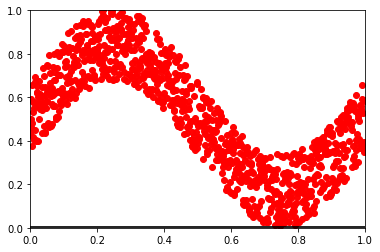

0.505695 interation 900


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


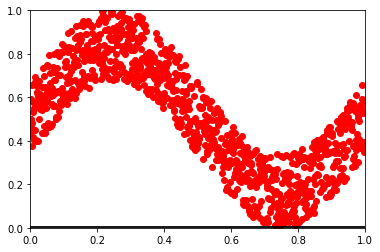

0.505695 interation 950


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


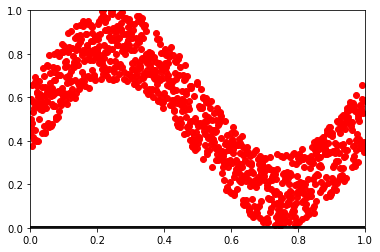

In [22]:
tf.reset_default_graph()
# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
# to avoid TF complaining about non-matrix mult.
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 100, activation='relu', scope='layer_1')
h2 = linear(h, 100, 50, activation='relu', scope='layer_2')
h3 = linear(h2, 50, 1, activation='relu', scope='layer_3')
Y_pred = tf.reduce_sum(h3, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Which combinations of activation functions and layers and nodes work best for you, and why? What if we had different training data ranges?

In [23]:
for op in tf.get_default_graph().get_operations(): 
    print(op.name)

x
y
ExpandDims/dim
ExpandDims
layer_1/W/Initializer/random_normal/shape
layer_1/W/Initializer/random_normal/mean
layer_1/W/Initializer/random_normal/stddev
layer_1/W/Initializer/random_normal/RandomStandardNormal
layer_1/W/Initializer/random_normal/mul
layer_1/W/Initializer/random_normal
layer_1/W
layer_1/W/Assign
layer_1/W/read
layer_1/b/Initializer/Const
layer_1/b
layer_1/b/Assign
layer_1/b/read
layer_1/MatMul
layer_1/add
layer_1/relu
layer_1/Shape
layer_2/W/Initializer/random_normal/shape
layer_2/W/Initializer/random_normal/mean
layer_2/W/Initializer/random_normal/stddev
layer_2/W/Initializer/random_normal/RandomStandardNormal
layer_2/W/Initializer/random_normal/mul
layer_2/W/Initializer/random_normal
layer_2/W
layer_2/W/Assign
layer_2/W/read
layer_2/b/Initializer/Const
layer_2/b
layer_2/b/Assign
layer_2/b/read
layer_2/MatMul
layer_2/add
layer_2/relu
layer_2/Shape
layer_3/W/Initializer/random_normal/shape
layer_3/W/Initializer/random_normal/mean
layer_3/W/Initializer/random_normal/s

In [24]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [25]:
show_graph(tf.get_default_graph())

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


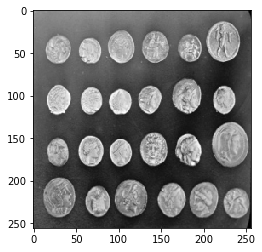

In [26]:
from skimage.data import coins
from scipy.misc import imresize
img = imresize(coins(), (256, 256))
plt.imshow(img, cmap='gray')
plt.show()

In [27]:

# We'll first collect all the positions in the image in our list, xs# We'll  
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# add dim for ys (so tf treats it as matrix)

ys = np.expand_dims(ys, axis=1)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((65536, 2), (65536, 1))

In [28]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')


n_neurons  = [2, 256, 128, 64, 32, 64, 128, 256, 1]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation="relu" if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_4/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_5/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_6/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_7/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_8/Shape:0", shape=(2,), dtype=int32)


0 36.494034
1 35.267334
2 29.772457
3 26.43375
4 23.119076
5 24.887815
6 19.80736
7 21.192154
8 17.946709
9 17.744793
10 17.673956
11 17.925224
12 18.052803
13 16.816462
14 16.815186
15 16.212513
16 15.842754
17 15.533957
18 14.274603
19 14.997047


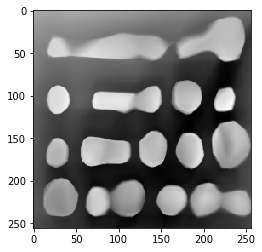

20 14.947731
21 13.771652
22 13.208786
23 12.4218445
24 12.620531
25 13.733168
26 12.336738
27 11.52472
28 11.571476
29 12.250614
30 11.104924
31 11.6596985
32 12.389429
33 12.424934
34 12.466335
35 11.176565
36 11.772858
37 10.552536
38 10.874541
39 11.07744


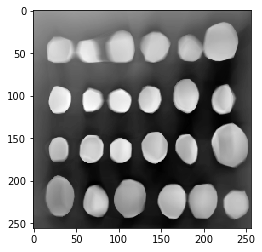

40 10.603622
41 9.906593
42 11.4321575
43 10.590907
44 10.306257
45 10.851862
46 10.135496
47 11.509905
48 10.298471
49 11.040447
50 9.907804
51 9.6185665
52 10.2812395
53 10.85251
54 9.612124
55 12.259247
56 10.025847
57 9.705175
58 10.074135
59 10.409187


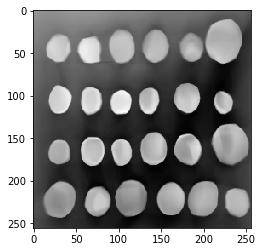

60 9.515223
61 9.096863
62 9.327568
63 10.18914
64 9.901842
65 9.59068
66 9.612164
67 9.670857
68 9.042762
69 9.958371
70 9.041931
71 9.066906
72 9.784195
73 10.023109
74 8.785738
75 8.4604225
76 9.671568
77 9.265875
78 10.367659
79 9.229917


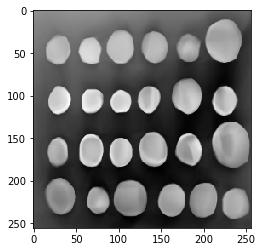

80 9.686198
81 9.16733
82 9.079284
83 9.075875
84 9.169545
85 8.427816
86 9.083871
87 9.954773
88 8.938324
89 9.005243
90 8.98236
91 8.666758
92 9.305609
93 8.889523
94 8.408353
95 8.708437
96 9.116811
97 8.449623
98 8.829092
99 9.337093


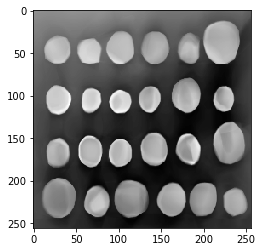

100 8.418643
101 8.541589
102 8.413729
103 8.575092
104 8.766657
105 9.05499
106 9.567678
107 8.452929
108 9.034981
109 8.565416
110 8.514807
111 8.005923
112 8.523262
113 8.486398
114 8.836041
115 8.4440155
116 9.25831
117 8.172387
118 8.146965
119 8.742014


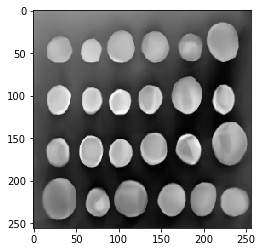

120 7.620179
121 8.22473
122 8.600187
123 8.101681
124 7.821351
125 9.037381
126 7.6628017
127 8.406527
128 8.410933
129 7.506028
130 8.096745
131 8.076749
132 8.664094
133 8.246242
134 8.521188
135 7.949511
136 7.992868
137 7.6081944
138 8.622497
139 8.2966175


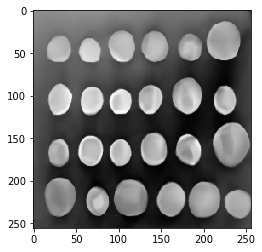

140 7.631555
141 7.881133
142 7.8574286
143 8.538694
144 8.166187
145 7.7864
146 7.8020124
147 8.326758
148 7.646632
149 7.630542
150 8.273287
151 8.176733
152 8.466648
153 8.336081
154 8.342108
155 7.6100616
156 8.158493
157 8.01916
158 8.015356
159 8.031166


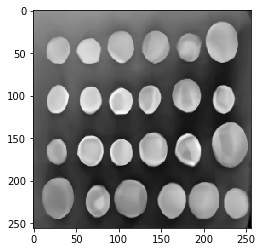

160 8.32449
161 7.6570644
162 9.722345
163 7.9973617
164 7.974747
165 7.5076222
166 7.670204
167 7.8042655
168 8.310949
169 7.6195264
170 7.6497135
171 7.8192453
172 7.6943784
173 8.28077
174 7.4855533
175 8.07711
176 7.9544954
177 7.744089
178 7.8245015
179 7.430386


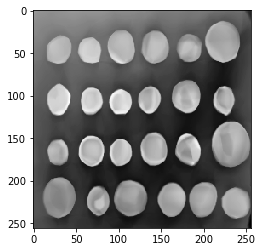

180 6.9574127
181 7.1335535
182 7.255204
183 7.8423924
184 8.151781
185 7.5987883
186 7.7478814
187 7.2476835
188 7.267242
189 7.3197436
190 8.222792
191 7.6987944
192 7.4716625
193 6.9452844
194 7.202124
195 7.285467
196 7.476493
197 7.663322
198 7.415683
199 7.6013384


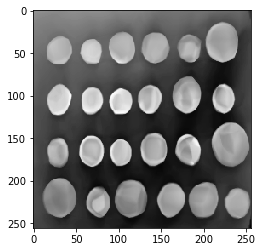

200 7.817892
201 7.435269
202 7.2814856
203 7.64331
204 7.4824057
205 7.6586156
206 7.723461
207 7.87085
208 7.590887
209 7.2113743
210 7.672305
211 7.165393
212 7.4348164
213 7.080066
214 7.517035
215 7.18196
216 7.0015817
217 7.0692225
218 7.8311586
219 7.2379


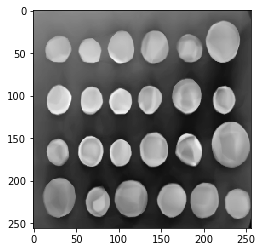

220 8.194017
221 7.383171
222 7.8756914
223 7.0615144
224 6.9208126
225 7.467121
226 7.24547
227 7.2781825
228 6.9966927
229 7.7415915
230 7.122139
231 7.3391876
232 7.560469
233 7.2386284
234 8.129181
235 7.365473
236 7.444861
237 7.396384
238 7.6556625
239 7.6137657


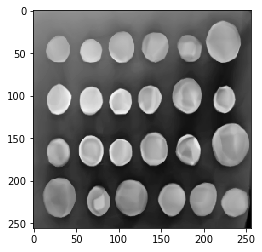

240 7.3560314
241 6.795953
242 8.101646
243 7.454977
244 7.1947527
245 7.979123
246 7.2673893
247 7.139408
248 7.113178
249 7.042835
250 7.603148
251 7.1973586
252 7.147148
253 7.0114393
254 7.5898085
255 7.3327446
256 7.021808
257 7.069452
258 7.395425
259 6.8639784


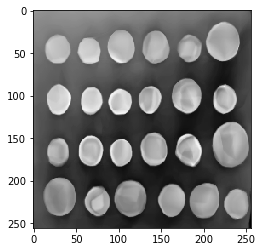

260 7.3187227
261 7.5136356
262 6.6240034
263 7.3315344
264 6.837024
265 7.1667843
266 6.7916565
267 6.552868
268 7.0838337
269 7.2901025
270 7.3927417
271 7.0663934
272 6.869139
273 7.7424326
274 6.8946524
275 7.1799784
276 6.745223
277 7.3112717
278 7.063446
279 7.036001


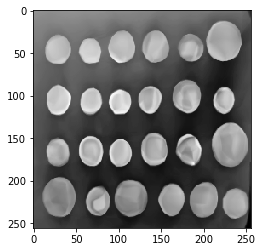

280 7.1680946
281 7.3763227
282 7.2117863
283 7.0087676
284 7.774412
285 7.054991
286 6.9573336
287 6.932056
288 6.8832135
289 6.5450253
290 6.875456
291 7.0027437
292 6.9986873
293 7.053298
294 6.9885926
295 7.12922
296 7.0497866
297 6.9107676
298 6.8643665
299 7.369158


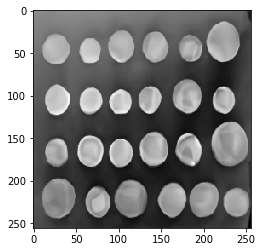

300 6.748347
301 6.996235
302 7.110714
303 6.715833
304 6.7663918
305 7.1034346
306 7.2000127
307 7.3041515
308 7.6881537
309 6.627132
310 6.827117
311 6.879963
312 6.963771
313 6.5479684
314 7.18993
315 7.117353
316 6.959092
317 7.1102777
318 6.7862787
319 6.2918506


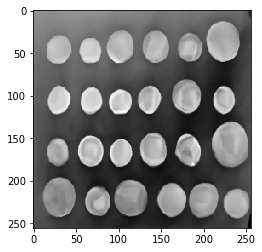

320 7.06994
321 7.6591654
322 7.4916086
323 6.712247
324 7.0026608
325 7.2348375
326 6.8070273
327 6.602936
328 7.023099
329 6.9821696
330 6.461899
331 6.7871075
332 7.094836
333 6.6483164
334 6.92705
335 6.862661
336 6.5610776
337 6.710615
338 7.3266754
339 6.8207383


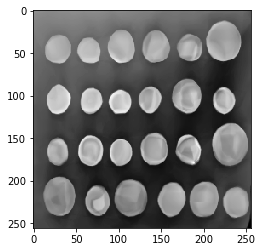

340 6.8398957
341 6.524128
342 6.707963
343 7.014978
344 7.0430913
345 7.0094414
346 6.5881033
347 6.8622923
348 6.465524
349 6.632671
350 6.763399
351 6.7833004
352 6.857892
353 7.06483
354 6.472232
355 6.76952
356 6.798459
357 6.599963
358 7.0897207
359 7.2100234


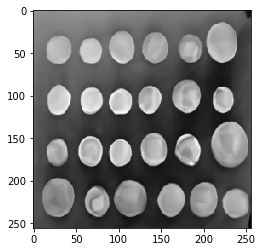

360 6.569047
361 6.5155125
362 6.8416
363 6.7634864
364 6.414013
365 6.599652
366 6.821465
367 6.9528084
368 6.801811
369 6.7958355
370 7.4603205
371 6.805643
372 7.2573156
373 6.3327355
374 6.5104375
375 7.0620856
376 6.7271614
377 6.4631166
378 7.01744
379 6.628476


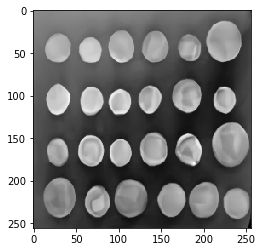

380 6.9068832
381 6.50253
382 6.3576417
383 7.028492
384 6.827222
385 6.5715876
386 6.91768
387 6.81442
388 6.628109
389 7.406212
390 6.6789627
391 6.529725
392 6.665293
393 6.6885753
394 6.6319504
395 6.629052
396 6.9066453
397 6.173389
398 6.5699754
399 6.5796785


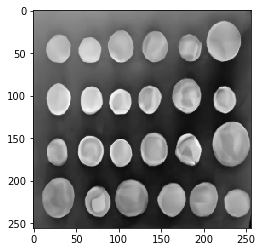

400 6.592864
401 6.5641603
402 6.4009886
403 6.597703
404 6.957749
405 6.8643894
406 6.7362237
407 6.6682796
408 6.3330007
409 6.218816
410 6.846126
411 6.96165
412 6.4704647
413 6.9165535
414 6.369602
415 6.4135647
416 6.586349
417 6.383697
418 6.0820637
419 6.5860944


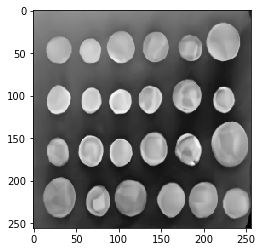

420 6.3095884
421 7.1026964
422 6.478352
423 6.933656
424 6.2616377
425 6.636801
426 6.423195
427 6.672349
428 6.8594685
429 6.495243
430 6.337282
431 6.560178
432 6.8125257
433 6.0529966
434 7.3311195
435 6.963367
436 6.1898227
437 6.5170126
438 6.6462083
439 6.245071


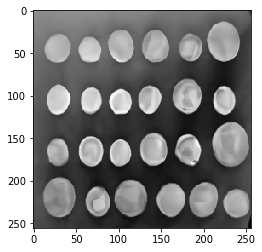

440 6.5725784
441 6.4747176
442 6.29589
443 6.3247714
444 6.8007603
445 6.3061447
446 6.3138647
447 6.5101886
448 6.3140416
449 6.7266507
450 6.4795375
451 6.3791103
452 6.6193256
453 6.7070665
454 6.1934395
455 6.6068034
456 6.531844
457 6.4404755
458 6.811347
459 6.0740976


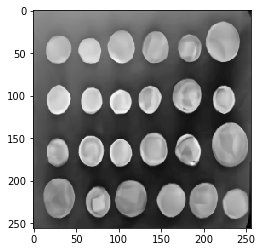

460 6.508132
461 6.045083
462 6.8407745
463 6.783837
464 6.071045
465 6.291819
466 6.598547
467 6.1424294
468 6.423316
469 6.2299304
470 6.5922837
471 6.4163785
472 6.647936
473 6.6455727
474 6.54688
475 6.3967414
476 6.7676835
477 6.541374
478 6.1006236
479 6.0521693


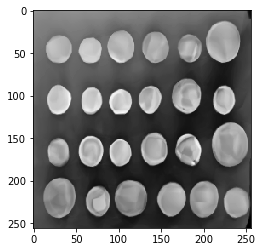

480 6.711639
481 6.754113
482 6.7288656
483 6.477033
484 6.1797895
485 6.4478416
486 6.318981
487 6.148407
488 6.489271
489 6.431343
490 6.147052
491 6.2834215
492 6.3433695
493 5.808797
494 6.223905
495 6.2186427
496 6.275838
497 6.7092586
498 6.174345
499 5.888674


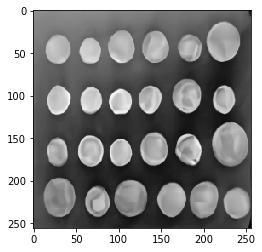

In [29]:
cost = tf.reduce_mean(
    tf.reduce_sum(tf.abs(Y_pred - Y), 1))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img, cmap='gray')
            plt.show()

We can also try to predict the normal (aka Gaussian) distribution instead of grayscale/rgb values. To do so we'll need to compute the means and standard deviation of our linear regression. This is called a **mixture density model**, or MDN. It's a bit ahead of where we need to be at this moment learning-wise, but perhaps the performance comparison is interesting. Note what we are doing is computing the density of Y given X (out of a possible total of 1. if all Y occured at a given X) and using this as our **cost function** instead of taking the mean of the absolute difference

In [30]:
tf.reset_default_graph()

xs = []
ys = []
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)
ys = (ys / 255.0)

# add dim for ys (so tf treats it as matrix)
ys = np.expand_dims(ys, axis=1)

In [31]:
# probability density function
# Note: not sure if below or sigma out of sqrt is right
def gausspdf(x, mean, sigma):
    return tf.exp(-(x - mean)**2 /
                  (2 * sigma**2)) / (tf.sqrt(2.0 * np.pi * sigma))

#def gausspdf(x, mean, sigma):
#    dist = tf.contrib.distributions.Normal(mean, sigma) 
#    return dist.prob(x)

def build_single_gaussian_model(n_input_features=2,
                                n_output_features=1,
                                n_neurons =[64, 28, 28, 14, 18, 54]):

    
    X = tf.placeholder(tf.float32, shape=[None, n_input_features], name='X')
    Y = tf.placeholder(tf.float32, shape=[None, n_output_features], name='Y')
    
    current_input = X
    for layer_i in range(1, len(n_neurons)):
        current_input = tfl.linear(
            inputs=current_input,
            num_outputs=n_neurons[layer_i],
            activation_fn=tf.nn.tanh if (layer_i+1) < len(n_neurons) else tf.nn.sigmoid
            scope='layer/' + str(layer_i))
    means = tfl.linear(
        inputs=current_input,
        num_outputs=n_output_features,
        activation_fn=None,
        scope='means')
    sigmas = tf.maximum(
        tfl.linear(
            inputs=current_input,
            num_outputs=n_output_features,
            activation_fn=tf.nn.relu,
            scope='sigmas'), 1e-8)

    p = gausspdf(Y, means, sigmas)
    negloglike = -tf.log(tf.maximum(p, 1e-8))
    cost = tf.reduce_mean(tf.reduce_sum(negloglike, 1))
    #cost = tf.reduce_mean(tf.reduce_mean(negloglike, 1))
    return X, Y, cost, means

SyntaxError: invalid syntax (<ipython-input-31-8131b4bf9748>, line 25)

In [ ]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    img_d = img
    X, Y, cost, means = build_single_gaussian_model()
    optimizer = tf.train.AdamOptimizer(0.005).minimize(cost)
    init_op = tf.global_variables_initializer()
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(init_op)
    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size:(batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        this_cost = sess.run([cost], feed_dict={X: xs, Y: ys})
        print('cost:', this_cost)
        if (it_i + 1) % 20 == 0:
            ys_pred = means.eval(feed_dict={X: xs}, session=sess)
            #img = np.clip(ys_pred.reshape(img.shape), 0, 1)
            img_d = ys_pred.reshape(img_d.shape)
            img_d = img_d/np.amax(img_d)
            plt.imshow(img_d, cmap='gray')
            plt.show()